In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

#不要顯示警告訊息,讓畫面比較乾淨
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\pyml_scripts\chapter05_decisiontree\winequality-red.csv', header=0, sep=';')
X = df.iloc[:,:-1]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [3]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [5]:
#觀察預測目標的分布
y.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot: >

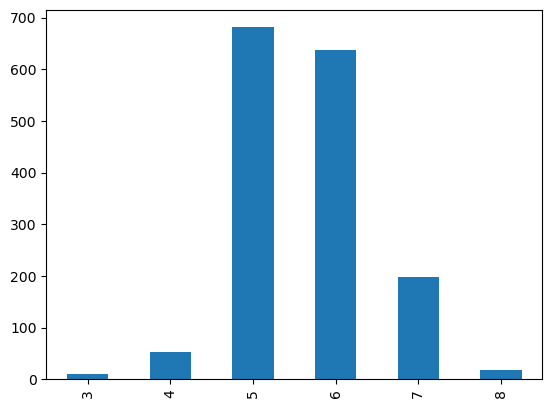

In [6]:
#繪製預測目標的分布狀況
y.value_counts().sort_index().plot(kind='bar')

In [7]:
y.value_counts().sort_index()/y.count()

3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: quality, dtype: float64

In [8]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [9]:
dt.fit(X_train, y_train)
print("決策樹準確度: " ,dt.score(X_test,y_test))

決策樹準確度:  0.615625


In [10]:
et = ExtraTreeClassifier()
et.fit(X_train, y_train)
print("極端隨機樹準確度: ", et.score(X_test,y_test))

極端隨機樹準確度:  0.603125


In [11]:
rfc = RandomForestClassifier(n_estimators = 250)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
print("隨機森林(250)準確度: ",rfc.score(X_test, y_test))

隨機森林(250)準確度:  0.6875


In [15]:
#所有資料先進行Standardization後,才進行分割為training/testing data
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc, y,test_size=0.2)
dt_sc = DecisionTreeClassifier()
dt_sc.fit(X_train_sc,y_train)
print("決策樹+標準化準確度: ",dt_sc.score(X_test_sc, y_test))

rfc_sc = RandomForestClassifier(n_estimators = 250)
rfc_sc.fit(X_train_sc, y_train)
y_predict = rfc_sc.predict(X_test_sc)
print("隨機森林+標準化(250)準確度: ",rfc_sc.score(X_test_sc, y_test))

決策樹+標準化準確度:  0.6125
隨機森林+標準化(250)準確度:  0.684375


In [16]:
#先分割為training/testing data,才對各自資料集進行Standardization
sc = StandardScaler()
X_train_sc1, X_test_sc1, y_train, y_test = train_test_split(X, y,test_size=0.2)
dt_sc = DecisionTreeClassifier()
dt_sc.fit(X_train_sc1,y_train)
print("決策樹+標準化準確度: ",dt_sc.score(X_test_sc1, y_test))

rfc_sc = RandomForestClassifier(n_estimators = 250)
rfc_sc.fit(X_train_sc1, y_train)
y_predict = rfc_sc.predict(X_test_sc1)
print("隨機森林+標準化(250)準確度: ",rfc_sc.score(X_test_sc1, y_test))

決策樹+標準化準確度:  0.571875
隨機森林+標準化(250)準確度:  0.715625


In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [18]:
y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [19]:
import pydotplus
from sklearn import tree

columns = X.columns
features = list(columns)
target_names = list(str(y.unique()))
dot_data = tree.export_graphviz(dt,out_file=None,feature_names=columns,class_names=target_names,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(r"c:\temp\dt_wine.pdf")

True

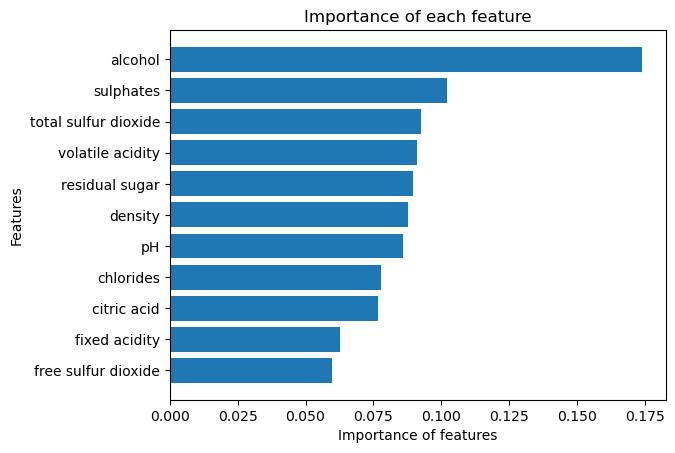

In [20]:
from matplotlib import  pyplot as plt
imp = dt.feature_importances_
names = df.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [21]:
import pydotplus
from sklearn import tree

columns = X.columns
features = list(columns)
target_names = list(str(y.unique()))
rfc_100 = rfc.estimators_[100]  #只能顯示random forest裡的某棵樹
dot_data = tree.export_graphviz(rfc.estimators_[100],out_file=None,feature_names=columns,class_names=target_names,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(r"c:\temp\rfc_wine.pdf")

True

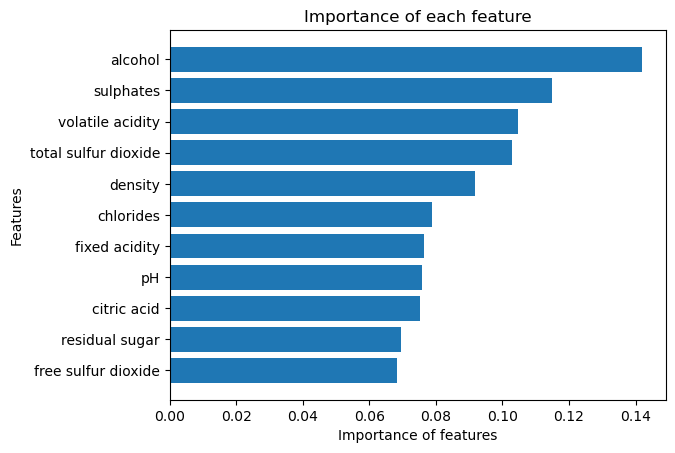

In [22]:
from matplotlib import  pyplot as plt
imp = rfc.feature_importances_
names = df.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
df = pd.read_csv(r'C:\pyml_scripts\chapter05_decisiontree\winequality-red.csv', header=0, sep=';')
X = df.drop(['pH','fixed acidity','free sulfur dioxide','residual sugar','quality'],axis=1)
Y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
rfc = RandomForestClassifier(n_estimators = 250)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.675

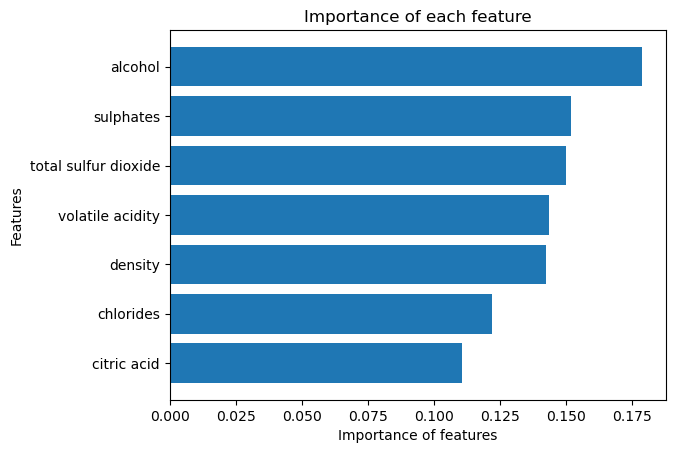

In [24]:
from matplotlib import  pyplot as plt
imp = rfc.feature_importances_
names = X.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()